<div style="display:flex; justify-content:column;  text-align:center;">
    <img style="width:120px; height:120px; margin-top:30px;" src="fst.jpg" />
    <h1 style="width:500px; font-size:34px; font-weight:400px; font-family:Serif; ">Faculté des Sciences et Techniques de Tanger Département Génie Informatique</h1>
    <img style="width:120px; height:120px; margin-top:30px;" src="uae.jpg" />
</div>

<div style="margin-top:60px">
    <h1 style="color:#1B9CFC; font-size:30px; text-align : center">Mini-projet</h1>
    <h1 style="color:#d63031; font-size:30px; text-align : center">Réseaux de neurones artificiels</h1>
</div>

<div style="display:flex; justify-content:column;  text-align:center; margin-top:20px; margin-bottom:20px;">
    <div style="margin-right:550px; margin-left:70px">
        <h3 style="color:#1B9CFC;">Encadré par : </h3>
        <h4>Mr.AIT KBIR</h4>
    </div>
    <div >
        <h3 style="color:#1B9CFC;">Réalisé par : </h3>
        <h4>AMMOR YAZID</h4>
        <h4>MESKINI MOHAMED SAAD</h4>
        <h4>EL ABDI ACHRAF</h4>
    </div>    
</div>   

<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">I -Introduction : </h2>
        <p  style="font-family:Serif; font-size:17px;">L’analyse de sentiment (ou sentiment analysis en anglais) est le processus qui consiste à déterminer l’opinion, le jugement et l’émotion qui se cache derrière le langage naturel.
Lorsque les individus laissent des avis en ligne, formulent des commentaires sur une marque ou répondent à des études de marché, leurs appréciations sont forcément teintées par des sentiments, qu’ils soient positifs, négatifs ou neutres.</p>
</div>

<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">II -But : </h2>
        <p  style="font-family:Serif; font-size:17px;">Utilisation des réseaux multi-couches pour l’analyse des sentiments des phrases issues d’une
base d’exemples qui contient des phrases étiquetées avec un sentiment positif ou négatif,.</p>
</div>

<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">1 - L'importation des packages necessaires </h2>

In [1]:
import numpy as np
import pandas as pd
#Importer les packages sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
#Importer le package nltk
import nltk 
from nltk.corpus import stopwords
import string

<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">2 - L'importation et preparation des données </h2>

In [2]:
#Lire le fichier des données
df =pd.read_excel('imdb_labelled.xlsx')
#Afficher les 10 premiers lignes
df.head(10)

,Commentaires,Note
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


array([[<AxesSubplot:title={'center':'Note'}>]], dtype=object)

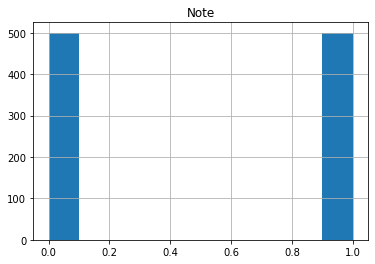

In [3]:
df.hist(column="Note")

In [4]:
#Afficher le nombre des lignes et colonnes
df.shape

(1000, 2)

In [5]:
#Afficher les noms des colonnes
df.columns

Index(['Commentaires', 'Note'], dtype='object')

In [6]:
#Afficher le nombre de données manquantes pour chaque colonne 
df.isnull().sum()

Commentaires    0
Note            0
dtype: int64

In [7]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def process_text(commentaire):
  #1-Supprimer la ponctuation 
  #2-Supprimer les stopwords
  #3-Renvoyer une liste de mots de texte propres

  #1
  nopunc =[char for char in commentaire if char not in string.punctuation]
  nopunc= ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words

In [9]:

df.loc[df['Note'] == 0.0, 'Note',] = 0
df.loc[df['Note'] == 1.0, 'Note',] = 1


In [10]:
x = df['Commentaires']
y = df['Note']

In [11]:
x = x.astype('string')

In [12]:
#Show the tokenization (a list of tokens also  called lemmas)
df['Commentaires'].head().apply(process_text)

0    [slowmoving, aimless, movie, distressed, drift...
1    [sure, lost, flat, characters, audience, nearl...
2    [Attempting, artiness, black, white, clever, c...
3                     [little, music, anything, speak]
4    [best, scene, movie, Gerardo, trying, find, so...
Name: Commentaires, dtype: object

In [13]:
#Convertir une collection de texte en une matrice des tokens 
cv = CountVectorizer()
x = cv.fit_transform(x)
x

<1000x3053 sparse matrix of type '<class 'numpy.int64'>'
	with 12671 stored elements in Compressed Sparse Row format>

<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">3 - Fragmentation des données </h2>

In [14]:
#Répartir les données en 80 % de formation et 20 % de test 
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size = 0.2)
print(x_train.shape)
print(x_test.shape)

(800, 3053)
(200, 3053)


<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">4 - Entrainer le modèle </h2>

In [15]:
#Créer le multi-couche Classifier
mlp = MLPClassifier(hidden_layer_sizes=(3,2), max_iter=500 , activation='identity')

<div>
        <p  style="font-family:Serif; font-size:17px;">Les paramètres :<br>
 <b>✓ hidden_layer_sizes : </b> Ce paramètre nous permet de définir le nombre de couches et le nombre de nœuds que nous souhaitons avoir dans le Neural Network Classifier.<br>
 <b>✓ max_iter : </b> il indique le nombre d'époques.<br>
 <b>✓ activation : </b> la fonction d'activation des couches masquées. .<br>
</div>

In [16]:
#Entrainer le modèle
mlp.fit(x_train , y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(3, 2), max_iter=500)

<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">5 -Tester le modèle </h2>

In [17]:
pred = mlp.predict(x_test)
pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">6 -Evaluer le modèle </h2>

<p  style="font-family:Serif; font-size:17px;">Un rapport de classification est utilisé pour mesurer la qualité des prédictions à partir d'un algorithme de classification. Combien de prédictions sont vraies et combien sont fausses</p>

In [18]:
#Évaluer le modèle sur l'ensemble de données d'apprentissage 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
pred = mlp.predict(x_train)
print(classification_report(y_train, pred))
print()
print("Confusion Matric; \n" , confusion_matrix(y_train , pred))
print()
print('Accuracy : ',accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       406

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Confusion Matric; 
 [[394   0]
 [  1 405]]

Accuracy :  0.99875


<div>
        <p  style="font-family:Serif; font-size:17px;">Les paramètres :<br>
 <b>✓ Précision : </b>Quel pourcentage de vos prédictions était correct ?<br>
 <b>✓ recall : </b>  Quel pourcentage de cas positifs avez-vous attrapé ?<br>
 <b>✓ Score F1 : </b> lQuel pourcentage de prédictions positives étaient correctes ? <br>
</div>

In [19]:
#Évaluer le modèle sur l'ensemble de données de test
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
pred = mlp.predict(x_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matric; \n" , confusion_matrix(y_test , pred))
print()
print('Accuracy : ',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       106
           1       0.76      0.80      0.78        94

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200


Confusion Matric; 
 [[82 24]
 [19 75]]

Accuracy :  0.785


<h2 style="font-family:Serif; color:##f39c12; font-size:27px; margin-bottom:0">7 -Implementer le modèle sur un exemple </h2>

In [20]:
msg = "Best movie ever"
data = [msg]
vect = cv.transform(data).toarray()
result= mlp.predict(vect)
print(result)
if(result == 1):
  print("positif")
else:
  print("Negatif")

[1]
positif


<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">Conclusion : </h2>
            <p  style="font-family:Serif; font-size:17px;">Scikit learn Python a fait ses preuves en étant capable d’aider les professionnels à résoudre les problèmes auxquels ils sont confrontés lorsqu’ils mettent en œuvre des modèles prédictifs. Il peut être utilisé pour mettre en œuvre l’apprentissage automatique et peut être associé à des visualisations de données, ce qui rend l’apprentissage automatique encore plus intéressant</p>
</div>

<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">Bibliographie : </h2>
           <p style="font-family:Serif; font-size:17px;">Documentation : <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html"  style="font-family:Serif; font-size:17px;">Sklearn MLPClassifier</a></p>
</div>